# Homework #2

In [2]:
#%matplotlib inline

In [46]:
# imports
#from matplotlib import pyplot as plt
import numpy as np

from astropy import units

from bokeh import plotting
from bokeh import models

In [24]:
def set_fontsize(p, fsz):
    '''
    Parameters
    ----------
    ax : Bokeh plot class
    fsz : float
      Font size
    '''
    p.xaxis.axis_label_text_font_size = '{:d}pt'.format(fsz)
    p.xaxis.major_label_text_font_size = "{:d}pt".format(fsz)
    #
    p.yaxis.axis_label_text_font_size = '{:d}pt'.format(fsz)
    p.yaxis.major_label_text_font_size = "{:d}pt".format(fsz)

# 1. Ocean Measurements

## a) Ocean Temperature

### i.  Early days -- Mercury thermometer in wooden bucket samples! 
### ii. Remote observing -- Infrared sensor measurements (with $\sim$1\,km resolution)

## b) Ocean salinity

### i.  Early days -- Titration via the chlorinity with standard silver nitrate solution

### ii. Modern -- Conductivity which requires a very well controlled Temperature (better than $\pm 0.001 K$ !)

## c) Ocean Currents

### Early days + Lagrangian -- Drift poles, observed to move relative to known landmarks

### Modern + Eulerian -- Electromagnetic method implements Faraday's law ($E = B \cdot L \cdot v$) and the concept of sea water as a conductor.  This leverages Earth's magnetic field $B$ to infer $v$.

# 2. Integrals

## a) $\int a \, dx = a \, x$

## b) $\int\limits_{-10}^{0} a \, dx = a \, x |_{-10}^{0} = 10 \, a$

### If $a = 13$, we evaluate to $130$

## c) $\int\limits_{-60}^{-50} a \, dx = a \, x |_{-60}^{-50} = 10 \, a = 130$

## d) $\int\limits_{-10}^{0} b \, x \, dx = (b/2) \, x^2 |_{-10}^{0} = -100 \, (b/2) = -12.5$

## e) $\int\limits_{-6}^{-50} b \, x \, dx = (b/2) \, x^2 |_{-6}^{-50} =  (b/2) 2464 = 308$

# 2. Derivatives

## a) $f(x) = 5$.  Therefore $df/dx = 0$

### Plot

In [3]:
x = np.linspace(-5., 5., 1000)

In [4]:
f_x = np.ones_like(x) * 5.
df_dx = np.zeros_like(x)

In [25]:
plotting.output_notebook()

p = plotting.figure(title='Derivatives', x_axis_label='x')

p.line(x, f_x, legend='f(x)', line_width=2)
p.line(x, df_dx, legend='df/dx', line_color='red', line_width=2)
p.legend.location = "center_left"

set_fontsize(p, 16)

plotting.show(p)

Loading BokehJS ...

## b) $f(x) = 5 \, x^2$.  Therefore $df/dx = 10 \, x$

In [26]:
f_x = x**2 * 5.
df_dx = 10 * x

### Plot

In [29]:
#plotting.output_notebook()

p = plotting.figure(title='Derivatives', x_axis_label='x')

p.line(x, f_x, legend='f(x)', line_width=2)
p.line(x, df_dx, legend='df/dx', line_color='red', line_width=2)
p.legend.location = "bottom_right"

set_fontsize(p, 16)

plotting.show(p)

# 3. Gaussian Hill

In [31]:
def h(x):
    A = 150. # m
    L = 500. # m
    return A * np.exp(-(x/L)**2)

## a) Plot

In [34]:
x = np.linspace(-2000., 2000., 1000)

In [36]:
p = plotting.figure(title='Gaussian', x_axis_label='x [m]', y_axis_label='h(x) [m]', plot_width=800)

p.line(x, h(x), line_width=2)

set_fontsize(p, 16)

plotting.show(p)

## b)

In [37]:
def dhdx(x):
    A = 150. # m
    L = 500. # m
    #
    return -(2*A/L**2) * x * np.exp(-(x/L)**2)

In [39]:
p = plotting.figure(title='Gaussian', x_axis_label='x [m]', y_axis_label='dh/dx', plot_width=800)

p.line(x, dhdx(x), line_width=2)

set_fontsize(p, 16)

plotting.show(p)

## c)

In [40]:
def dh2dx2(x):
    A = 150. # m
    L = 500. # m
    #
    return -(2*A/L**2) * (1-2*(x/L)**2) * np.exp(-(x/L)**2)

In [42]:
p = plotting.figure(title='d2h/dx2', x_axis_label='x [m]', y_axis_label='d2h/dx2', plot_width=800)
p.line(x, dh2dx2(x), line_width=2)
set_fontsize(p, 16)
plotting.show(p)

## d) 

### i.  The first curve is a simple Gaussian.
### ii. The first derivative is the slope of the curve.  As we go up the Gaussian, it is positive and increases initially before turning over.  It should be zero at the peak (and is).  It then turns negative as we proceed down the hill.

### iii. The second derivative describes the change in the slope.  It is initially positive as the slope increases and then turns negative as we approach the summit.  The 2nd deriviatve also describes the concave/convex nature of a curve with negative implying concave down pointing.

----

# 4. Gradient

## a) Draw a contour plot of a ridge that extends infinitely far at $h=50$m

### Am struggling to intuit this one.  I am going to draw a series of contours that are separated by 20m in altitude starting from 30m.

### Let's find the $x$ values

In [43]:
def xval(h):
    A = 150. # m
    L = 500. # m
    #
    xv = L * np.sqrt(-1 * np.log(h/A))
    return xv

In [44]:
hvalues = np.arange(30., 151., 20.)
hvalues

array([ 30.,  50.,  70.,  90., 110., 130., 150.])

In [45]:
xvalues = xval(hvalues)
xvalues

array([634.31812059, 524.07353698, 436.50316495, 357.36033068,
       278.45777431, 189.14336074,  -0.        ])

#### Plot

In [65]:
p = plotting.figure(title='Contours', x_axis_label='x [m]', y_axis_label='y (N/S) [m]', plot_width=800)
vlines = []
for x in xvalues:
    vlines.append(models.Span(location=-1*x, dimension='height', line_width=2))
#
lbl1 = models.Label(x=-1*xvalues[1], y=0., #x_units='screen', y_units='screen',
            text='h = 50m', text_font_size='16pt', text_align='center', text_color='blue')
lbl2 = models.Label(x=0., y=0., #x_units='screen', y_units='screen',
            text='h = 150m', text_font_size='16pt', text_align='center', text_color='blue')
#
p.x_range = models.Range1d(-800, 100)
p.y_range = models.Range1d(-1000, 1000)
#
p.renderers.extend(vlines)
p.add_layout(lbl1)
p.add_layout(lbl2)
set_fontsize(p, 16)
plotting.show(p)

## b) Symmetric hill, $h(r)$ with $r = \sqrt{x^2 + y^2}$

### This will be a set of circles centered on $x=y=0$m

### We can use the same xvalues from above

In [61]:
xvalues

array([634.31812059, 524.07353698, 436.50316495, 357.36033068,
       278.45777431, 189.14336074,  -0.        ])

### Maximum gradient occurs whtn $dh/dx$ is maximum

### This occurs when $d^2h/dx^2 = 0$, i.e. when $1-2(x_{\rm max}/L)^2 = 0$

### Which gives $x_{\rm max} = L/\sqrt{2} = 353.5$m

<Figure size 432x288 with 0 Axes>

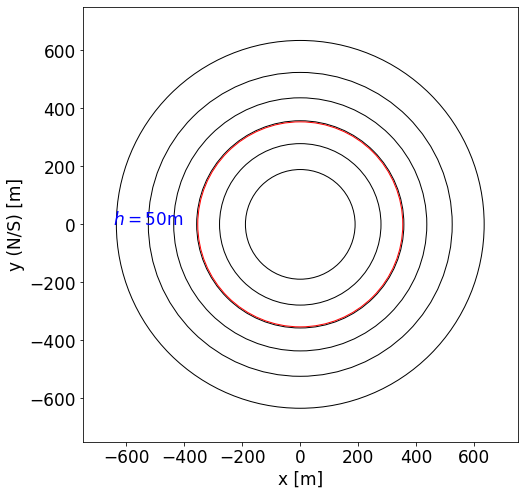

In [78]:
plt.clf()
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
# Plot the contours
for x in xvalues:
    c = plt.Circle((0,0), np.abs(x), color='k', fill=False)
    ax.add_artist(c)
# Plot the special contour
c2 = plt.Circle((0,0), np.abs(500./np.sqrt(2)), color='r', fill=False)
ax.add_artist(c2)
#
#
ax.set_xlabel('x [m]')
ax.set_ylabel('y (N/S) [m]')
vlim = 750.
ax.set_ylim(-1*vlim, vlim)
ax.set_xlim(-1*vlim, vlim)

ax.set_aspect('equal')

# Label one line
ax.text(-1*xvalues[1], 0., r'$h = 50$m', fontsize=17, ha='center', color='blue')
#ax.text(0., 0., r'$h = 150$m', fontsize=17, ha='center', color='blue')

set_fontsize(ax, 17)
#plt.show()

### The height at the maximum gradient contour is:

In [81]:
h(500./np.sqrt(2)) * units.m

<Quantity 90.97959896 m>

## c) The weakest gradient will also occur when $d^2h/dx^2 = 0$.  Referring to our figure above, this will surely be at the top of the hill! :)

----

# 5. Divergence

## a) Tube time

### Plot

<Figure size 432x288 with 0 Axes>

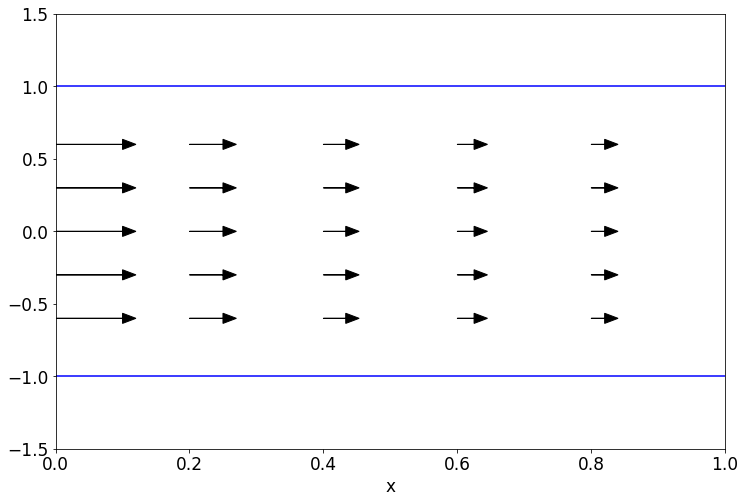

In [92]:
plt.clf()
fig = plt.figure(figsize=(12, 8))
ax = plt.gca()
# Make a tube
ax.axhline(1., color='b')
ax.axhline(-1., color='b')
# Arrows
for kk,x in enumerate([0., 0.2, 0.4, 0.6, 0.8]):
    for y in [-0.6, -0.3, 0., 0.3, 0.6]:
        ax.arrow(x, y, 0.1/(kk+1), 0., head_width=0.07, head_length=0.02, fc='k', ec='k')

ax.set_xlabel('x')
#ax.set_ylabel('y (N/S) [m]')
ax.set_xlim(0, 1.)
ax.set_ylim(-1.5, 1.5)

set_fontsize(ax, 17)
plt.show()

### The sign of $du/dx$ is negative.

### I believe the air flow is converging at the end of the tube, i.e. the air molecules are getting closer together at the far end.

## b) As there is no flow, $du/dx = 0$ and $\nabla \cdot \bf u = 0$

### For open ends, $du/dx = 0$ because $\bf u$ is a constant.

## c) Sink

### Sure looks convergent to me.

### $(x<0, y=0):  du/dx < 0, dv/dy = 0$
### $(y<0, x=0):  du/dx = 0, dv/dy < 0$

### $(x>0, y=0):  du/dx < 0, dv/dy = 0$
### $(y>0, x=0):  du/dx = 0, dv/dy < 0$

### Given the above, $\nabla \cdot \bf u < 0$

----

# 6. Curl

## In the picture, curling my finglers along the flow points my thumb inward giving a negative curl,

### $\nabla \times \bf u < 0$

### $(x=-4, y=0):  du/dy = 1, dv/dx = 0, \nabla \times \bf u = -1 \hat z$

### $(x=0, y=-4):  du/dy = 0, dv/dx = -1, \nabla \times \bf u = -1 \hat z$

### This is consistent with the right hand rule